# Lead Scoring Case Study

#### Brief of the case study
X Education Compnay sell Online courses to industry profoessionals. These courses details are offered in their website as well 
they are marketing the same in search engine google. company also get the lead through referals, Once these lead aquired, sells
person call or write email for conversion of these leads. typically lead conversion rates are 30% which is not great as per 
management expectation
#### Expectation of the managaement:
Management want to identify the most "POTENTIAL LEADS" or the "HOT LEADS", that will help to increase the over all conversion 
rates to 80% as well as the productivity of the sales team will go up


## Process for reaching to the conclusion
1. Reading all libaries 
2. Reading & understanding the data
3. Data Cleaning
4. Getting infrences after data cleaning
5. Scaling the data
6. Building the model
7. ROC Curve
8. Checking confusion matrix
9. Final conclusion

### Importing all libaries 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks


import statsmodels
import statsmodels.api as sm #to build linear model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

### Reading & understanding the data

In [6]:
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
data.shape

(9240, 37)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [9]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### With the data we have undertstand there is 9240 rows & 3 columns & 35 Variables as 2 column is Prospect number & Lead number 


### Data Cleaning
As we have observed there are many columns where the value is selcted as "SELECT" as for better understanding of the data we
should impute this "SELECT" as NaN

In [10]:
data = data.replace('Select', np.nan)

In [11]:
data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [12]:
# checking for null values
data.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                 

In [13]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [14]:
# lets first drop columns with more than 70% null values

data = data.drop(data.loc[:, list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns,1)
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted 

### We should check null value column by column to understand 

In [15]:
# Lead Quality Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

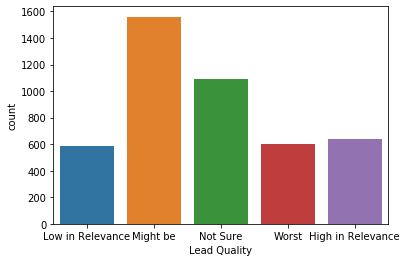

In [16]:
sns.countplot(data['Lead Quality'])

#### So as we can see Lead Quality has five type of outputs

1. Might be
2. Not Sure
3. High in Relevance
4. Worst
5. Low in Relevance
and it wii be an important variable for analysis, So converting NaN values to 'Not Sure' will be good.
This will help sales person to focus on converting Not Sure by constant marketing compaign like telecalling, SMS, EMail 

In [17]:
#converting NaN values to Not Sure

data['Lead Quality']= data['Lead Quality'].replace(np.nan, 'Not Sure')

In [18]:
data['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### Now let's go for Asymmetrique index section

Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score and Asymmetrique Profile Score all of them have same percentage of missing values.

In [19]:
data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [20]:
data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [21]:
data['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

In [22]:
data['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

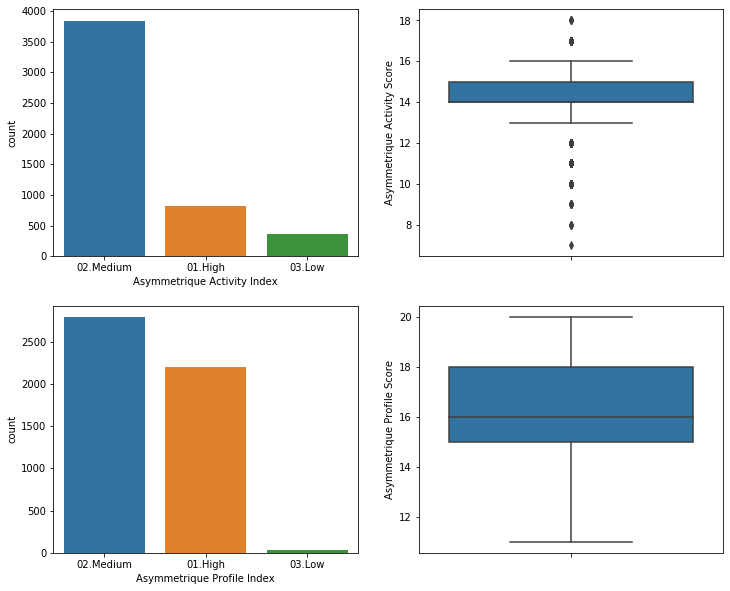

In [23]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)

sns.countplot(data['Asymmetrique Activity Index'])

plt.subplot(2,2,2)

sns.boxplot(data['Asymmetrique Activity Score'],orient= 'v')

plt.subplot(2,2,3)

sns.countplot(data['Asymmetrique Profile Index'])

plt.subplot(2,2,4)

sns.boxplot(data['Asymmetrique Profile Score'],orient='v')

plt.show()

#### There is too much variation in thes parameters so its not reliable to impute any value in it.
#### 45% null values means we need to drop these columns.

In [24]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Lead Number                                       0.00
Do Not Call                                       0.00
Search                                            0.00
A free cop

In [25]:
# Now let's look at the 'City' section
data['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [26]:
data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

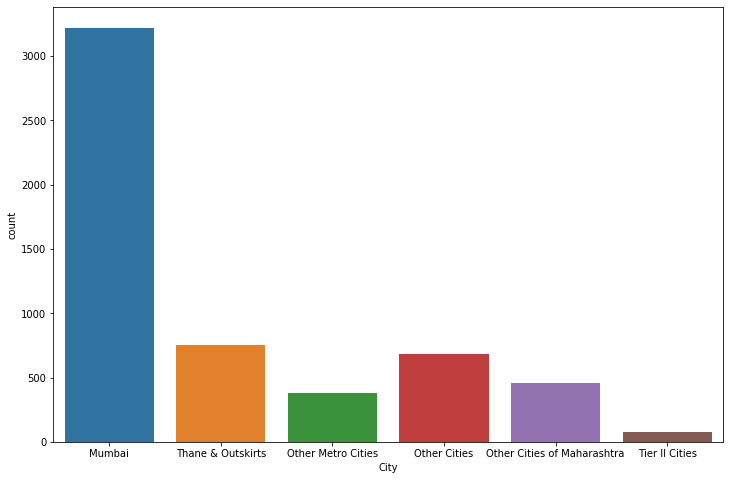

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(data['City'])

In [28]:
3222/5571

0.5783521809369951

##### So out of 5571 data points in city 3222 are of mumbai , which is majority compared to others. But as we have different countries in the country column , so specifically defining any city would not be a proper decission, so let's just convert them to "Unknown"

In [29]:
data['City'] = data['City'].replace(np.nan, 'Unknown')
data['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
# Now let's look at Specialization column
data['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [31]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

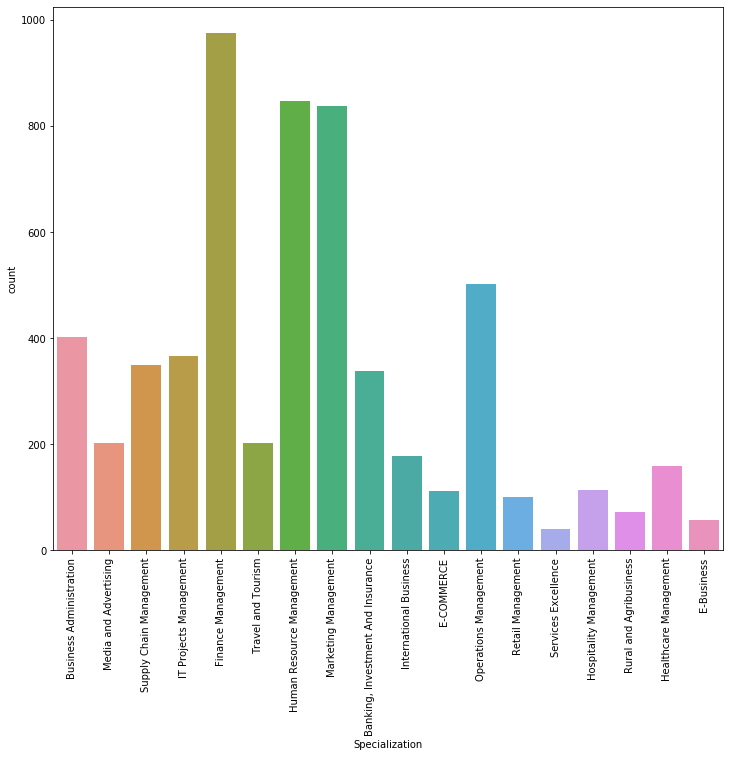

In [32]:
plt.figure(figsize=(12,10))
sns.countplot(data['Specialization'])
xticks(rotation = 90)

##### It might be the case that lead has not entered any specialization if his/her option is not availabe on the list, may not have any specialization or is a student. so assigning any specfic domain to the data wouldn't dojustice to the data. Hence let's assign them to an domain 'Others'

In [33]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine  

In [34]:
# now let's look afetr 'Tags'
data['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [35]:
data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

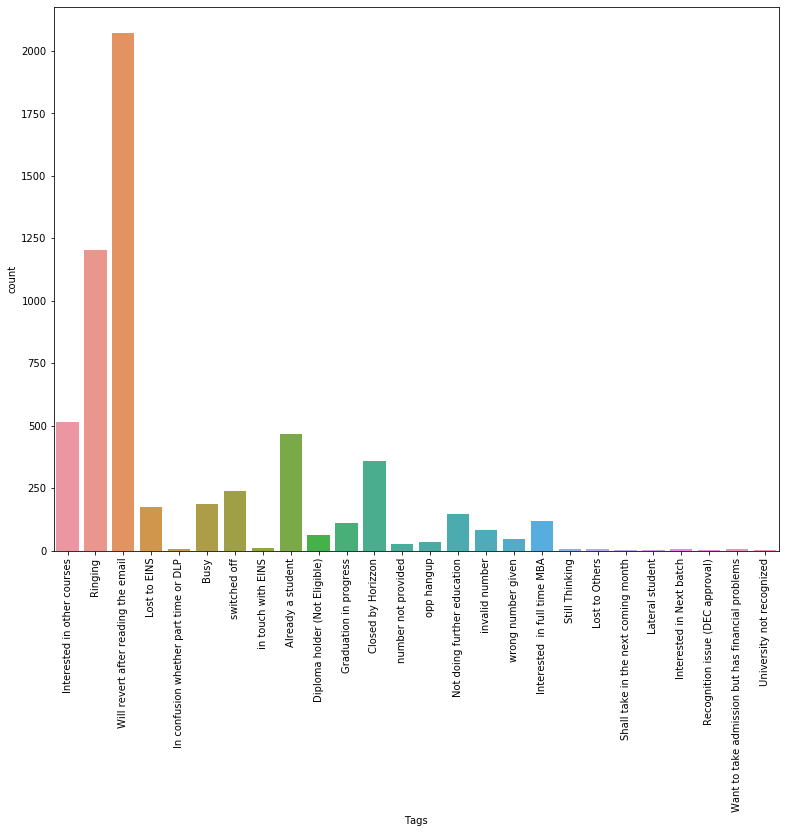

In [36]:
plt.figure(figsize=(13,10))
sns.countplot(data.Tags)
xticks(rotation = 90)

In [37]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.

data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [38]:
data['Tags'].describe()

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

#### By changing blank column to "will revert after reading the email" will give option for more data to convert in Hot Leads 

In [39]:
# Now let's look at 'What matters most to you in choosing a course' column

data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [40]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### From the above we can see that 99.5% reswponses for What matters most to you in choosing a course went for Better Career Prospects.

so we can change the null values to 'Better Career Prospects'.

In [41]:
data['What matters most to you in choosing a course']=data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [42]:
# Now let's focus on 'What is your current Occupation'

data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [43]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### 85.4% entries are of 'Unemployed'.

so we can convert the null values to 'Unemployed'.

In [44]:
data['What is your current occupation']=data['What is your current occupation'].replace(np.nan,'Unemployed')
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
What matters most to you in choosing a course     0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
What is your current occupation                   0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Newspaper 

In [45]:
# let's look after the "Country" column
data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [46]:
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Kuwait                     4
Germany                    4
Sweden                     3
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Philippines                2
Bangladesh                 2
Italy                      2
China                      2
Uganda                     2
Netherlands                2
Vietnam                    1
Tanzania                   1
Russia                     1
Switzerland                1
Indonesia                  1
Malaysia                   1
Denmark       

In [47]:
# It's clearly visible that among all the entries 'India' Has highest number of entries.
# So let's convert the null values to 'India'
data['Country']=data['Country'].replace(np.nan,'India')
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What matters most to you in choosing a course    0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
Search                                           0.00
A free copy of Mastering The Interview           0.00
Magazine                                         0.00
Newspaper Article           

In [48]:
# rest few columns have very low missing values, so we can just remove those rows
data.dropna(inplace = True)
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)

Last Notable Activity                            0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
Magazine                                         0.0
Newspaper Article                             

In [49]:
data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [50]:
data['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [51]:
data['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [52]:
data['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [53]:
data['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [54]:
data['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [55]:
data['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [56]:
data['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

####  Both 'Do Not Email' and 'Do Not Call' Has mostly 'No' Values so it'll be better to drop them
####  Similarly 'Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement' , have alsmost only 'No' values, so they are of no use
####  Hence it is better to drop them also

In [57]:
data = data.drop(['Do Not Email', 'Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement'],1)

In [58]:
data.shape

(9074, 23)

### Performing EDA

### Bivariate Analysis

In [59]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,Interested in other courses,Low in Relevance,No,No,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,Not Sure,No,No,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [60]:
converted = round(100*(sum(data['Converted'])/len(data['Converted'].index)),2)
converted

37.86

#### So in the current data set conversion rate is 37.86% 

### Lead Origin

In [61]:
data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

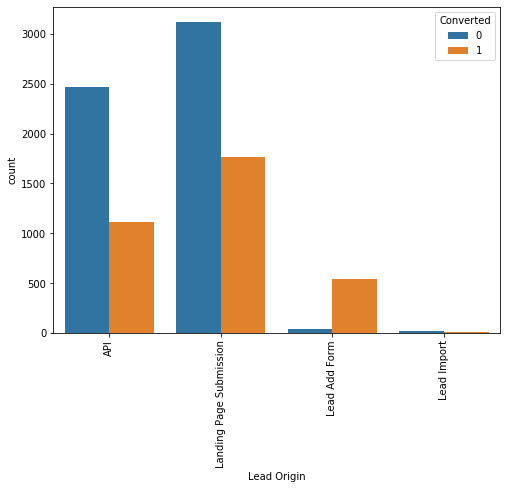

In [62]:
plt.figure(figsize=(8,6))

sns.countplot(x='Lead Origin', hue='Converted', data=data)
xticks(rotation = 90)

plt.show()

### From the above graph we can infer that :

1. API has around 30-32 % conversion rate.

2. Landing Page Submission has around 35% conversion rate.

3. Lead Add Form has around 90% conversion rate.

4. Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### Lead Source

In [63]:
data['Lead Source'].describe()

count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [64]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

In [65]:
# Lead source has duplicates of Google, let's combine them

data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')


In [66]:
# As we can see max lead is from google , let's combine other lead source to one section i.e 'Others'

data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

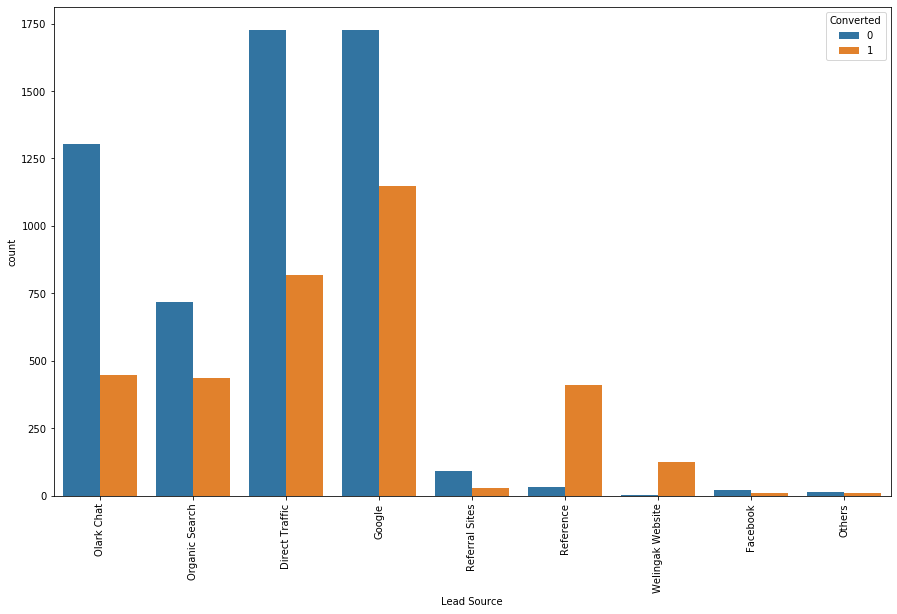

In [67]:
plt.figure(figsize=(15,9))

sns.countplot(x = 'Lead Source', hue = 'Converted', data = data)

xticks(rotation = 90)

#### We can conclude from the above graph that conversion rate is higher from 'Reference' and 'Welingak Website'.

#### Google and Direct traffic are generating maximum number of leads.

### Total Visits

In [68]:
data['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

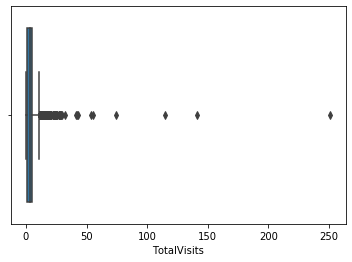

In [69]:
sns.boxplot(data['TotalVisits'])

In [70]:
#so as we can see there are outliers in the dataset , let's cap them

percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

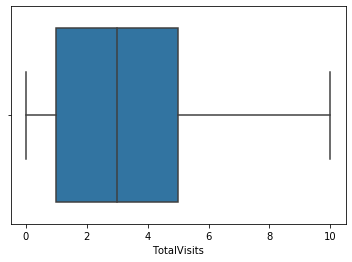

In [71]:
sns.boxplot(data['TotalVisits'])

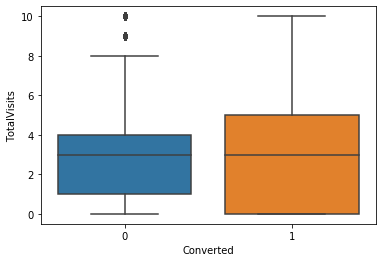

In [72]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

#### Median for both converted and not converted leads same.
#### So nothing conclusive can be said as per 'TotalVisits'.

### Total Time Spent on Website

In [73]:
data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

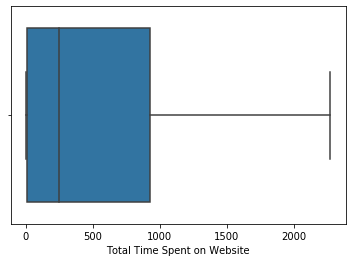

In [74]:
sns.boxplot(data['Total Time Spent on Website'])

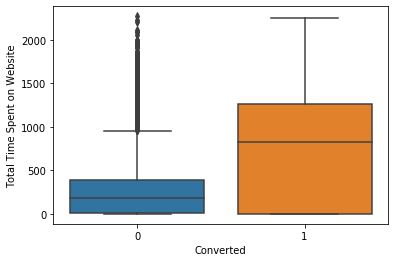

In [75]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

### Leads spending more time on the website are more likely to be converted.
So the website should me made more engaging to make the leads spend more time.

### Page views per visit

In [76]:
data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

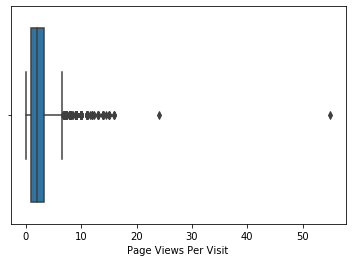

In [77]:
sns.boxplot(data['Page Views Per Visit'])

In [78]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

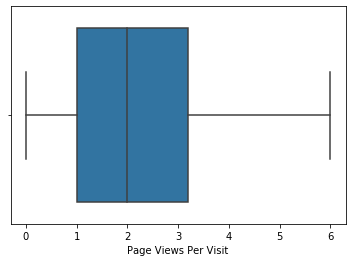

In [79]:
sns.boxplot(data['Page Views Per Visit'])

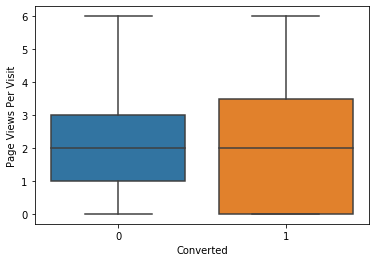

In [80]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

### Last Activity

In [81]:
data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [82]:
data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

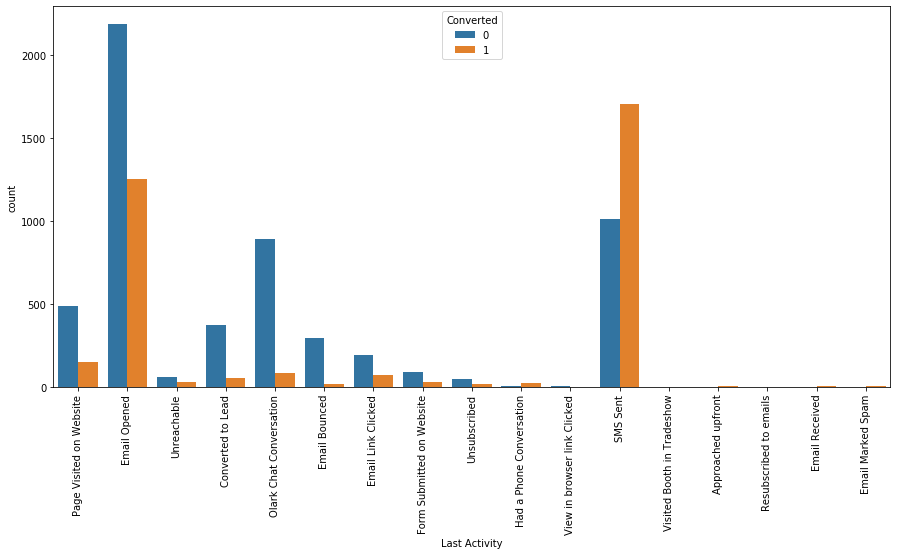

In [83]:
plt.figure(figsize=(15,7))

sns.countplot(x='Last Activity', hue = 'Converted', data= data)

xticks(rotation=90)

In [84]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

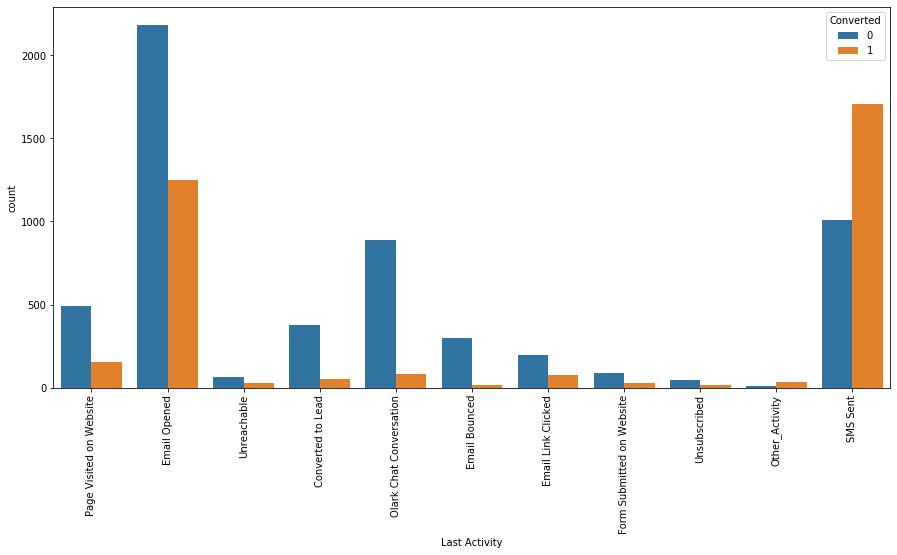

In [85]:
plt.figure(figsize=(15,7))

sns.countplot(x='Last Activity', hue = 'Converted', data= data)

xticks(rotation=90)

### From the above graph we can infer that :

- Most number of people have opened the mail.
- Maximum number of conversions are coming from sms sent.
- Only around 6-8% of emails are bounced.

### Country

In [86]:
data['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

#### Specialization

In [87]:
data['Specialization'].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [88]:
data['Specialization'].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

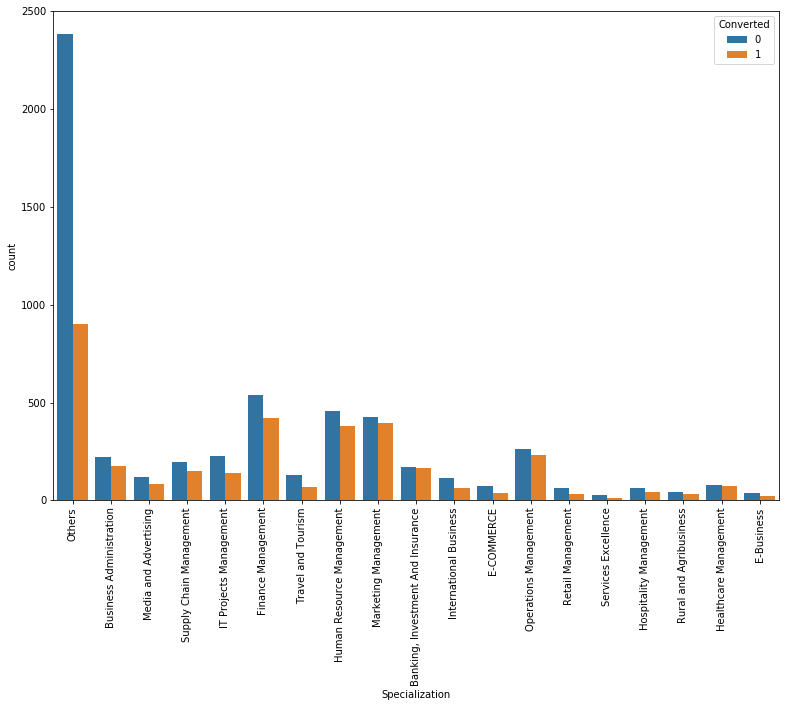

In [89]:
plt.figure(figsize=(13,9))

sns.countplot(x='Specialization', hue='Converted', data=data)

xticks(rotation=90)

#### Occupation

In [90]:
data['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [91]:
data['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

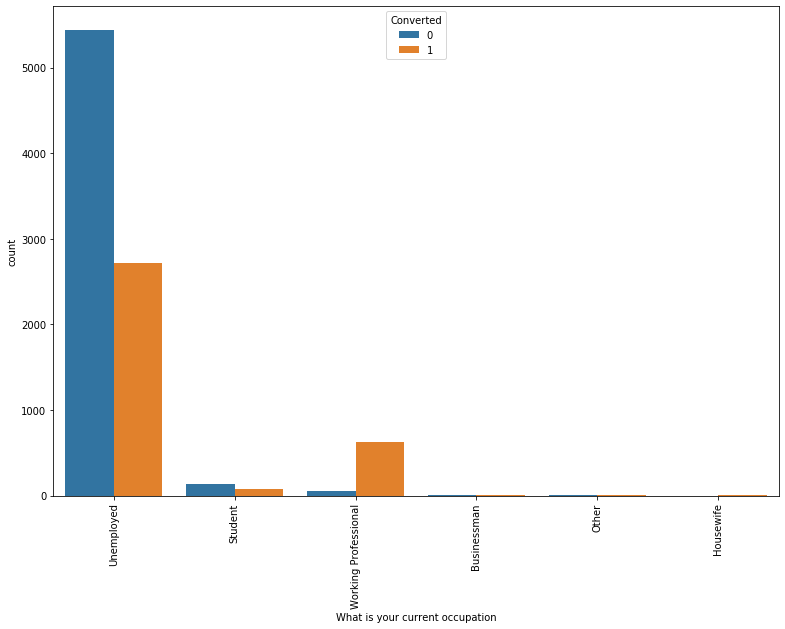

In [92]:
plt.figure(figsize=(13,9))

sns.countplot(x='What is your current occupation', hue='Converted', data=data)

xticks(rotation=90)

#### Number of leads on unemployeed are very high so this has to be focus are for converting more for upscaling for better job opportunity


### What matters most to you in choosing a course

In [93]:
data['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [94]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Through Recommendations

In [95]:
data['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [96]:
data['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

#### Receive More Updates About Our Courses

In [97]:
data['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [98]:
data['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

### Tags

In [99]:
data.Tags.describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

In [100]:
data.Tags.value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

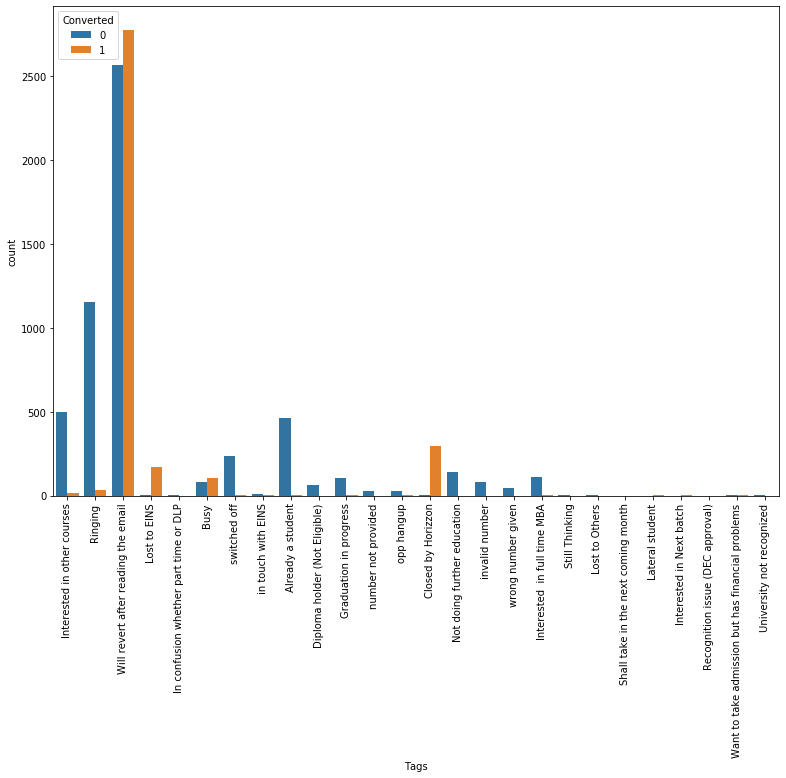

In [101]:
plt.figure(figsize=(13,9))

sns.countplot(x='Tags', hue='Converted', data=data)

xticks(rotation=90)

In [102]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

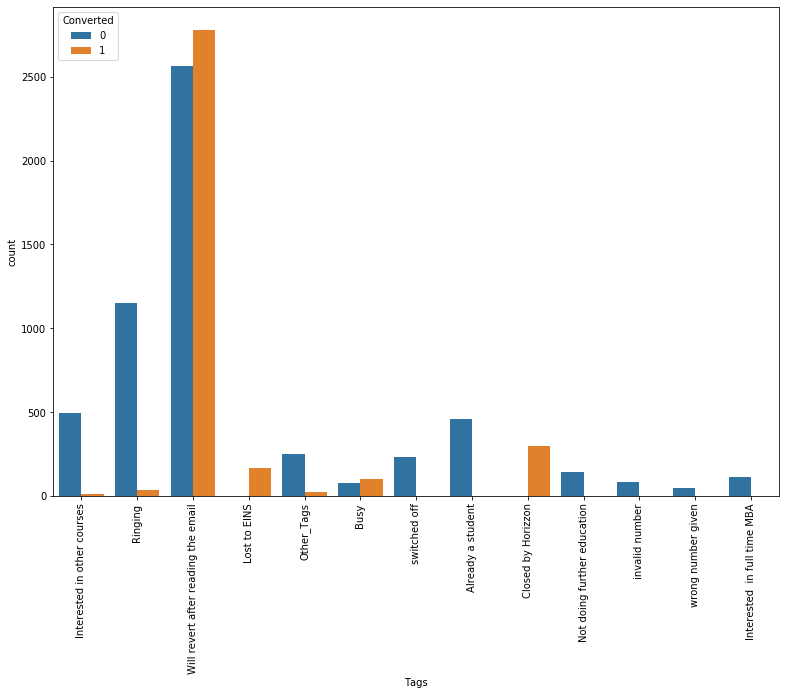

In [103]:
plt.figure(figsize=(13,9))

sns.countplot(x='Tags', hue='Converted', data=data)

xticks(rotation=90)

#### Interested in course but conversion is less need to check this with marketing campaign here what is the reason for not getting good conversion from here

### Lead Quality

In [104]:
data['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

In [105]:
data['Lead Quality'].value_counts()

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

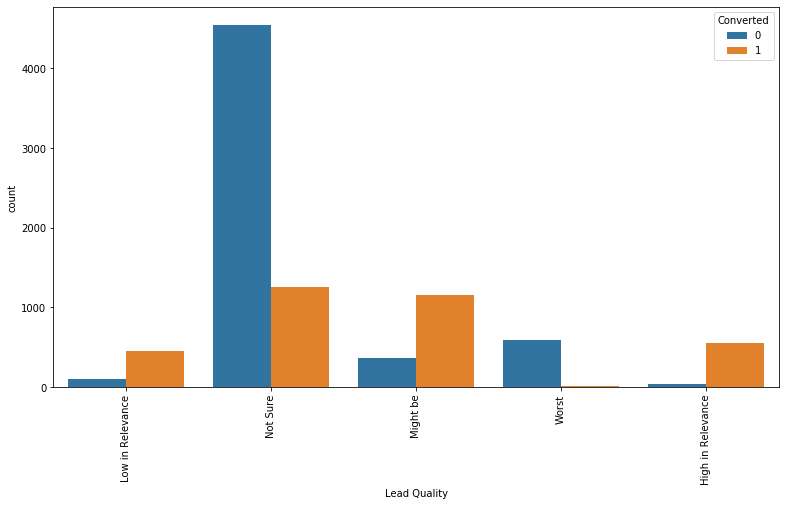

In [106]:
plt.figure(figsize=(13,7))

sns.countplot(x='Lead Quality', hue='Converted', data=data)

xticks(rotation=90)

#### 'Not Sure' has higher number of entries and less number of conversions.

#### where as 'Low in Relevance', 'Might be', 'High in Relevance' has higher number of conversions.

### Update me on Supply Chain Content

In [107]:
data['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

#### Get updates on DM Content

In [108]:
data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

### City

In [109]:
data['City'].describe()

count        9074
unique          7
top       Unknown
freq         3575
Name: City, dtype: object

In [110]:
data['City'].value_counts()

Unknown                        3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

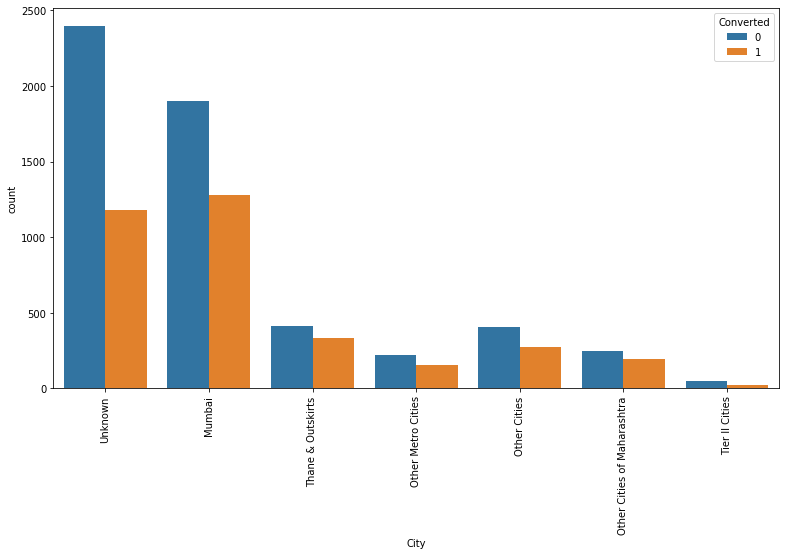

In [111]:
plt.figure(figsize=(13,7))

sns.countplot(x='City', hue='Converted', data=data)

xticks(rotation=90)

#### I agree to pay the amount through cheque


In [112]:
data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

#### A free copy of Mastering The Interview

In [113]:
data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [114]:
data['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [115]:
data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Form Submitted on Website          1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

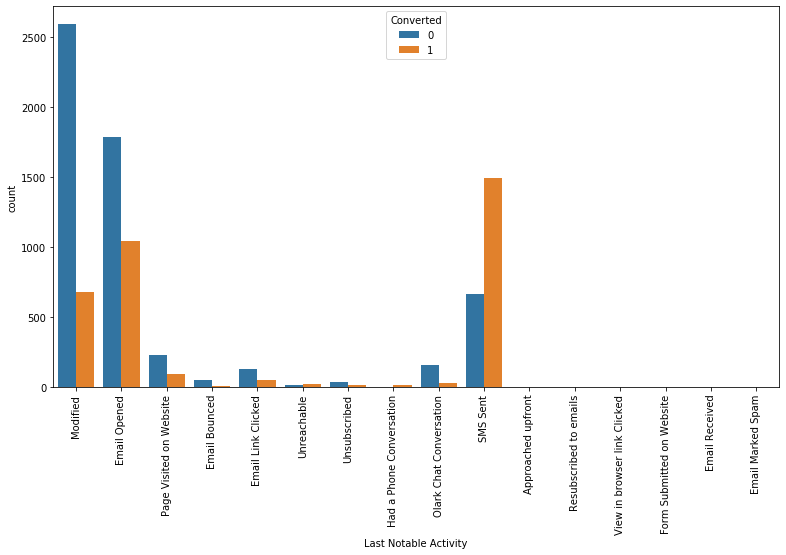

In [116]:
plt.figure(figsize=(13,7))

sns.countplot(x='Last Notable Activity', hue='Converted', data=data)

xticks(rotation=90)

In [117]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074 

#### Bases on the above result we are dropping below columns as this will have least impact in the over all model
1. Lead Number
2. What matters most to you in choosing a course
3. Through Recommendations
4. Receive More Updates About Our Courses
5. Update me on Supply Chain Content
6. Get updates on DM Content
7. City
8. I agree to pay the amount through cheque
9. A free copy of Mastering The Interview
10.Country

In [118]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','City', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified


In [119]:
data.shape

(9074, 13)

### Data Preparation

In [120]:
data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'Last Notable Activity'],
      dtype='object')

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
Last Notable Activity              9074 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


#### Creating Dummy Variables

In [122]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'Tags', 'Lead Quality','Last Notable Activity']], drop_first=True)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [123]:
# Adding the results to the master dataframe

data = pd.concat([data, dummy], axis=1)

data.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [124]:
# Dropping the columns for which we have created dummies

data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'Tags', 'Lead Quality','Last Notable Activity'], axis = 1)
data.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [125]:
data.shape

(9074, 80)

In [126]:
# Now let's do the train test split

from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = data.drop(['Prospect ID', 'Converted'], axis=1)

In [127]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [128]:
# Putting response variable to y

y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [129]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

In [130]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [131]:
# Conversion rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

### Model Building

#### Model-1

In [132]:
import statsmodels.api as sm

In [133]:
# Logistic regression model
lrm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lrm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.0
Date:                Sun, 06 Sep 2020   Deviance:                       2524.1
Time:                        10:23:22   Pearson chi2:                 3.51e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.9169   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.1918      0.086      2.234      0.026       0.023       0.360
Total Time Spent on Website                              1.1451      0.063     18.049      0.000       1.021       1.269
Page Views Per Visit                                    -0.3343      0.098     -3.401      0.001      -0.527      -0.142
Lead Origin_Landing Page Submission                     -1.0004      0.220     -4.548      0.000      -1.432      -0.569
Lead Origin_Lead Add Form                               -0.3305      1.273     -0.260      0.795      -2.826       2.165
Lead Origin_Lead Import                                 29.5800   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.4737   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2358      0.152      1.548      0.122      -0.063       0.534
Lead Source_Olark Chat                                   0.8938      0.232      3.853      0.000       0.439       1.348
Lead Source_Organic Search                               0.2546      0.208      1.222      0.222      -0.154       0.663
Lead Source_Others                                       0.7283      0.794      0.917      0.359      -0.828       2.285
Lead Source_Reference                                    1.6429      1.328      1.237      0.216      -0.960       4.245
Lead Source_Referral Sites                              -0.0442      0.488     -0.091      0.928      -1.001       0.912
Lead Source_Welingak Website                             5.2807      1.469      3.594      0.000       2.401       8.160
Last Activity_Email Bounced                             -1.5432      0.770     -2.005      0.045      -3.051      -0.035
Last Activity_Email Link Clicked                         0.8418      0.644      1.307      0.191      -0.420       2.104
Last Activity_Email Opened                               0.0104      0.385      0.027      0.978      -0.744       0.764
Last Activity_Form Submitted on Website                  0.1194      0.594      0.201      0.841      -1.044       1.283
Last Activity_Olark Chat Conversation                   -0.5730      0.392     -1.461      0.144      -1.342       0.196
Last Activity_Other_Activity                             1.4618      1.200      1.219      0.223      -0.889       3.813
Last Activity_Page Visited on Website                    0.3152      0.450      0.701      0.484      -0.567       1.197
Last Activity_SMS Sent                                   1

### Feature Selection Using RFE

In [134]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [135]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [136]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 42),
 ('Lead Source_Reference', False, 64),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 32),
 ('Last Activity_Email Opened', False, 45),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other_Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 43),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activity_Unreachable', False, 15),
 ('L

In [137]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 42),
 ('Lead Source_Reference', False, 64),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 32),
 ('Last Activity_Email Opened', False, 45),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other_Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 43),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activity_Unreachable', False, 15),
 ('L

In [138]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [139]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Sp

### Assessing the models with statsmodel
#### Model-2

In [140]:
X_train_sm = sm.add_constant(X_train[col])
lrm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1590.7
Date:                Sun, 06 Sep 2020   Deviance:                       3181.3
Time:                        10:23:27   Pearson chi2:                 3.69e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8912      0.216     -8.748      0.000      -2.315      -1.467
Lead Origin_Lead Add Form                                1.0089      0.357      2.824      0.005       0.309       1.709
Lead Source_Welingak Website                             3.4331      0.816      4.209      0.000       1.834       5.032
Last Activity_Email Bounced                             -1.6726      0.406     -4.122      0.000      -2.468      -0.877
What is your current occupation_Working Professional     1.2456      0.284      4.394      0.000       0.690       1.801
Tags_Busy                                                3.5832      0.333     10.770      0.000       2.931       4.235
Tags_Closed by Horizzon                                  7.7856      0.763     10.208      0.000       6.291       9.280
Tags_Lost to EINS                                        8.9875      0.754     11.919      0.000       7.510      10.465
Tags_Ringing                                            -1.9623      0.339     -5.783      0.000      -2.627      -1.297
Tags_Will revert after reading the email                 3.7431      0.230     16.278      0.000       3.292       4.194
Tags_invalid number                                    -23.4201   2.23e+04     -0.001      0.999   -4.37e+04    4.37e+04
Tags_switched off                                       -2.6298      0.586     -4.487      0.000      -3.779      -1.481
Tags_wrong number given                                -23.0415   3.16e+04     -0.001      0.999    -6.2e+04    6.19e+04
Lead Quality_Not Sure                                   -3.3591      0.128    -26.151      0.000      -3.611      -3.107
Lead Quality_Worst                                      -3.7864      0.845     -4.480      0.000      -5.443      -2.130
Last Notable Activity_SMS Sent                           2.7492      0.121     22.664      0.000       2.511       2.987
========================================================================================================================
"""

In [141]:
# column 'Tags_invalid number' has very high p-value
#so let's drop the column

col1= col.drop('Tags_invalid number',1)

In [142]:
col1

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model-3

In [143]:
X_train_sm = sm.add_constant(X_train[col1])
lrm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1596.6
Date:                Sun, 06 Sep 2020   Deviance:                       3193.1
Time:                        10:23:28   Pearson chi2:                 3.63e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0583      0.218     -9.453      0.000      -2.485      -1.632
Lead Origin_Lead Add Form                                1.0408      0.359      2.899      0.004       0.337       1.745
Lead Source_Welingak Website                             3.3973      0.816      4.162      0.000       1.797       4.997
Last Activity_Email Bounced                             -1.6713      0.406     -4.117      0.000      -2.467      -0.876
What is your current occupation_Working Professional     1.2845      0.287      4.483      0.000       0.723       1.846
Tags_Busy                                                3.7672      0.331     11.376      0.000       3.118       4.416
Tags_Closed by Horizzon                                  7.9409      0.763     10.406      0.000       6.445       9.437
Tags_Lost to EINS                                        9.1498      0.755     12.124      0.000       7.671      10.629
Tags_Ringing                                            -1.7632      0.337     -5.231      0.000      -2.424      -1.102
Tags_Will revert after reading the email                 3.9096      0.231     16.938      0.000       3.457       4.362
Tags_switched off                                       -2.4244      0.585     -4.147      0.000      -3.570      -1.278
Tags_wrong number given                                -20.8443   1.16e+04     -0.002      0.999   -2.28e+04    2.28e+04
Lead Quality_Not Sure                                   -3.3514      0.128    -26.139      0.000      -3.603      -3.100
Lead Quality_Worst                                      -3.8070      0.845     -4.508      0.000      -5.462      -2.152
Last Notable Activity_SMS Sent                           2.7087      0.119     22.668      0.000       2.474       2.943
========================================================================================================================
"""

In [144]:
# column 'Tags_wrong number given' should be removed as it has high p-value

col2 = col1.drop('Tags_wrong number given',1)

In [145]:
col2

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Model-4

In [146]:
X_train_sm = sm.add_constant(X_train[col2])
lrm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.7
Date:                Sun, 06 Sep 2020   Deviance:                       3197.3
Time:                        10:23:28   Pearson chi2:                 3.64e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1281      0.217     -9.808      0.000      -2.553      -1.703
Lead Origin_Lead Add Form                                1.0531      0.360      2.925      0.003       0.348       1.759
Lead Source_Welingak Website                             3.3847      0.817      4.144      0.000       1.784       4.985
Last Activity_Email Bounced                             -1.6736      0.406     -4.123      0.000      -2.469      -0.878
What is your current occupation_Working Professional     1.2999      0.288      4.515      0.000       0.736       1.864
Tags_Busy                                                3.8426      0.330     11.651      0.000       3.196       4.489
Tags_Closed by Horizzon                                  8.0081      0.763     10.496      0.000       6.513       9.503
Tags_Lost to EINS                                        9.2190      0.755     12.218      0.000       7.740      10.698
Tags_Ringing                                            -1.6855      0.336     -5.022      0.000      -2.343      -1.028
Tags_Will revert after reading the email                 3.9804      0.230     17.319      0.000       3.530       4.431
Tags_switched off                                       -2.3450      0.584     -4.017      0.000      -3.489      -1.201
Lead Quality_Not Sure                                   -3.3511      0.128    -26.149      0.000      -3.602      -3.100
Lead Quality_Worst                                      -3.8041      0.845     -4.501      0.000      -5.461      -2.148
Last Notable Activity_SMS Sent                           2.6987      0.119     22.675      0.000       2.465       2.932
========================================================================================================================
"""

### Checking VIF's

In [147]:
# Check for the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.36
5,Tags_Closed by Horizzon,1.15
4,Tags_Busy,1.11
10,Lead Quality_Not Sure,1.10
2,Last Activity_Email Bounced,1.06
6,Tags_Lost to EINS,1.05
9,Tags_switched off,1.04
11,Lead Quality_Worst,1.02
0,Lead Origin_Lead Add Form,0.67
3,What is your current occupation_Working Profes...,0.59


### So Final Model will have 13 Varibales
Few notable attributes are Lead Source, Lead Origin, Tags are very very important to increase the number of hot leads

In [149]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)

y_train_pred[:10]

3009    0.182597
1012    0.133249
9226    0.000773
4750    0.768495
7987    0.976792
1281    0.989553
2880    0.182597
4971    0.743085
7536    0.864396
1248    0.000773
dtype: float64

In [150]:
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([1.82597468e-01, 1.33248841e-01, 7.72777273e-04, 7.68495226e-01,
       9.76792316e-01, 9.89553366e-01, 1.82597468e-01, 7.43085067e-01,
       8.64396034e-01, 7.72777273e-04])

### Creating a dataframe with the actual conversion flag and the predicted probabilities.

In [151]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.182597,3009
1,0,0.133249,1012
2,0,0.000773,9226
3,1,0.768495,4750
4,1,0.976792,7987


#### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [152]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.182597,3009,0
1,0,0.133249,1012,0
2,0,0.000773,9226,0
3,1,0.768495,4750,1
4,1,0.976792,7987,1


### Confusion matrix

In [153]:
from sklearn import metrics

In [154]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)

print(confusion)

[[3747  158]
 [ 353 2093]]


Predicted           not conversion    converison
Actual

not converison        3747              158

conversion            353              2093

In [155]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9195402298850575


#### Metrics beyond simply accuracy

In [213]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [157]:
#Sensitivity

TP / float(TP+FN)

0.8556827473426002

In [158]:
#Specificity

TN / float(TN+FP)

0.9595390524967989

In [159]:
#False postive rate(FPR)- predicting conversion when customer has not converted

print(FP/ float(TN+FP))

0.04046094750320103


In [160]:
#Positive predictive value 

print (TP / float(TP+FP))

0.929808973789427


In [161]:
#Negative predictive value

print (TN / float(TN+ FN))

0.9139024390243903


#### Plotting the ROC Curve:
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

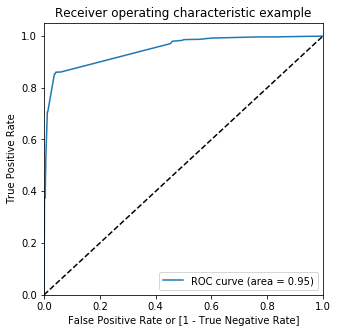

In [164]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point
Basically it is the point where we get balanced sensitivity and specficity.(The point where accuracy , sensitivity, specificity meet)

In [165]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.182597,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.133249,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000773,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.768495,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.976792,7987,1,1,1,1,1,1,1,1,1,1,1


In [166]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.689970  0.982829  0.506530
0.2   0.2  0.909621  0.860589  0.940333
0.3   0.3  0.918910  0.860180  0.955698
0.4   0.4  0.919698  0.858136  0.958259
0.5   0.5  0.919540  0.855683  0.959539
0.6   0.6  0.919855  0.854456  0.960819
0.7   0.7  0.920013  0.851186  0.963124
0.8   0.8  0.879232  0.708095  0.986428
0.9   0.9  0.813888  0.526574  0.993854


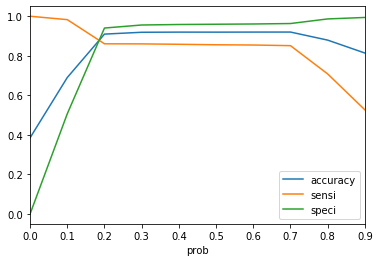

In [167]:
#Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [168]:
#### From the curve above, 0.20 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.20 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.182597,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.133249,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000773,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.768495,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.976792,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [169]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head(30)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.182597,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.133249,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.000773,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.768495,4750,1,1,1,1,1,1,1,1,1,0,0,1,77
4,1,0.976792,7987,1,1,1,1,1,1,1,1,1,1,1,1,98
5,1,0.989553,1281,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.182597,2880,0,1,1,0,0,0,0,0,0,0,0,0,18
7,1,0.743085,4971,1,1,1,1,1,1,1,1,1,0,0,1,74
8,1,0.864396,7536,1,1,1,1,1,1,1,1,1,1,0,1,86
9,0,0.000773,1248,0,1,0,0,0,0,0,0,0,0,0,0,0


In [170]:
#Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # True positive 
TN = confusion2[0,0] # True negatives
FP = confusion2[0,1] # False positives
FN = confusion2[1,0] # False negatives

In [171]:
#Sensitivity

TP / float(TP+FN)

0.8605887162714636

In [172]:
#Specificity

TN / float(TN+FP)

0.9403329065300896

In [173]:
#False postive rate(FPR)- predicting conversion when customer has not converted

print(FP/ float(TN+FP))

0.05966709346991037


In [174]:
#Positive predictive value 

print (TP / float(TP+FP))

0.9003421727972626


In [175]:
#Negative predictive value

print (TN / float(TN+ FN))

0.9150261649638675


In [176]:
### Precision and Recall
#Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3747,  158],
       [ 353, 2093]], dtype=int64)

### Precision

In [177]:
#TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.929808973789427

### Recall

In [178]:
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8556827473426002

#### Using sklearn utilities for the same¶

In [179]:
from sklearn.metrics import precision_score, recall_score

In [180]:
#Precision

precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.929808973789427

In [181]:
#Recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8556827473426002

#### Precision Recall Trade Off

In [182]:
from sklearn.metrics import precision_recall_curve

In [183]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [184]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

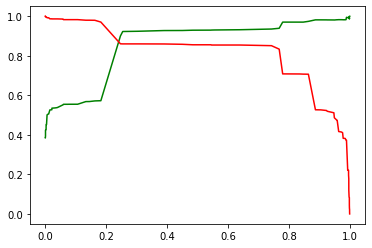

In [185]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the Test set:

In [186]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [187]:
X_test = X_test[col2]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,1,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [188]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [189]:
y_test_pred = res.predict(X_test_sm)

In [190]:
y_test_pred[:10]

3271    0.182597
1490    0.958995
7936    0.182597
4216    0.999026
3830    0.182597
1800    0.958995
6507    0.011362
4821    0.000400
4223    0.996331
4714    0.182597
dtype: float64

In [191]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [192]:
y_pred_1.head()

,0
3271,0.182597
1490,0.958995
7936,0.182597
4216,0.999026
3830,0.182597


In [193]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [194]:
# Putting 'Prospect ID' to index

y_test_df['Prospect ID'] = y_test_df.index

In [195]:
# Removing index for both the dataframes to concat them side by side 

y_pred_1.reset_index(drop=True, inplace=True)

y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# Concating y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [197]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.182597
1,1,1490,0.958995
2,0,7936,0.182597
3,1,4216,0.999026
4,0,3830,0.182597


In [198]:
# Renaming the column to Converted_prob

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [199]:
# Rearrange the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

In [200]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.182597
1,1490,1,0.958995
2,7936,0,0.182597
3,4216,1,0.999026
4,3830,0,0.182597


In [214]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.20 else 0)

In [215]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.182597,0
1,1490,1,0.958995,1
2,7936,0,0.182597,0
3,4216,1,0.999026,1
4,3830,0,0.182597,0


In [216]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.906720528828498

### Confusion Matrix for test set:¶

In [217]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1634,  100],
       [ 154,  835]], dtype=int64)

     Predicted     not_converted    converted
     Actual

    not_converted         1634      100

        converted           154       835

In [218]:
TP = confusion2[1,1] #True positive 
TN = confusion2[0,0] #True negatives
FP = confusion2[0,1] #False positives
FN = confusion2[1,0] #False negatives

In [219]:
#Sensitivity

TP / float(TP+FN)

0.8442871587462083

In [220]:
#Specificity
TN / float(TN+FP)

0.9423298731257209

In [221]:
#False postive rate(FPR)- predicting conversion when customer has not converted

print(FP/ float(TN+FP))

0.05767012687427912


In [222]:
#Positive predictive value 

print (TP / float(TP+FP))

0.893048128342246


In [223]:
#Negative predictive value

print (TN / float(TN+ FN))

0.9138702460850112


In [224]:
#TP / TP + FP Precsion 

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.929808973789427

In [225]:
#Recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8556827473426002